## Fragments| analysis by chopping molecule according to given radious (no retrosynthesis rules used): 

In [22]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
import pandas as pd
AllChem.SetPreferCoordGen(True)
import mols2grid


In [ ]:

# function to devide molecule by given radious
def getSubmolRadN(mol, radius):
    atoms=mol.GetAtoms()
    submols=[]
    for atom in atoms:
        env=Chem.FindAtomEnvironmentOfRadiusN(mol, radius, atom.GetIdx())
        amap={}
        submol=Chem.PathToSubmol(mol, env, atomMap=amap)
        subsmi=Chem.MolToSmiles(submol, rootedAtAtom=amap[atom.GetIdx()], canonical=False)
        submols.append(Chem.MolFromSmiles(subsmi, sanitize=False))
    return submols



### fragmentstion of 'n1c(N3CCN(C(=O)C)CC3)c(C#N)cc2cc(OC)ccc12'



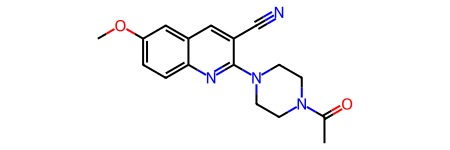

In [4]:
# convert smiles to rdkit mol
mol = Chem.MolFromSmiles('n1c(N3CCN(C(=O)C)CC3)c(C#N)cc2cc(OC)ccc12')
mol

In [5]:
# use getSubmolRadN function to get fragments, fragments will be in rdkit object
getSubmolRadN(mol, 1)

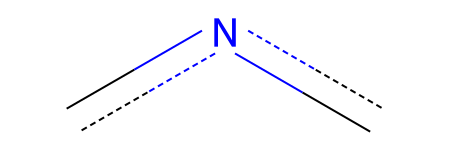

In [6]:
# make list of fragments
list_of_fragments= getSubmolRadN(mol, 1)

# visualise 1st fragment from list
list_of_fragments[0]

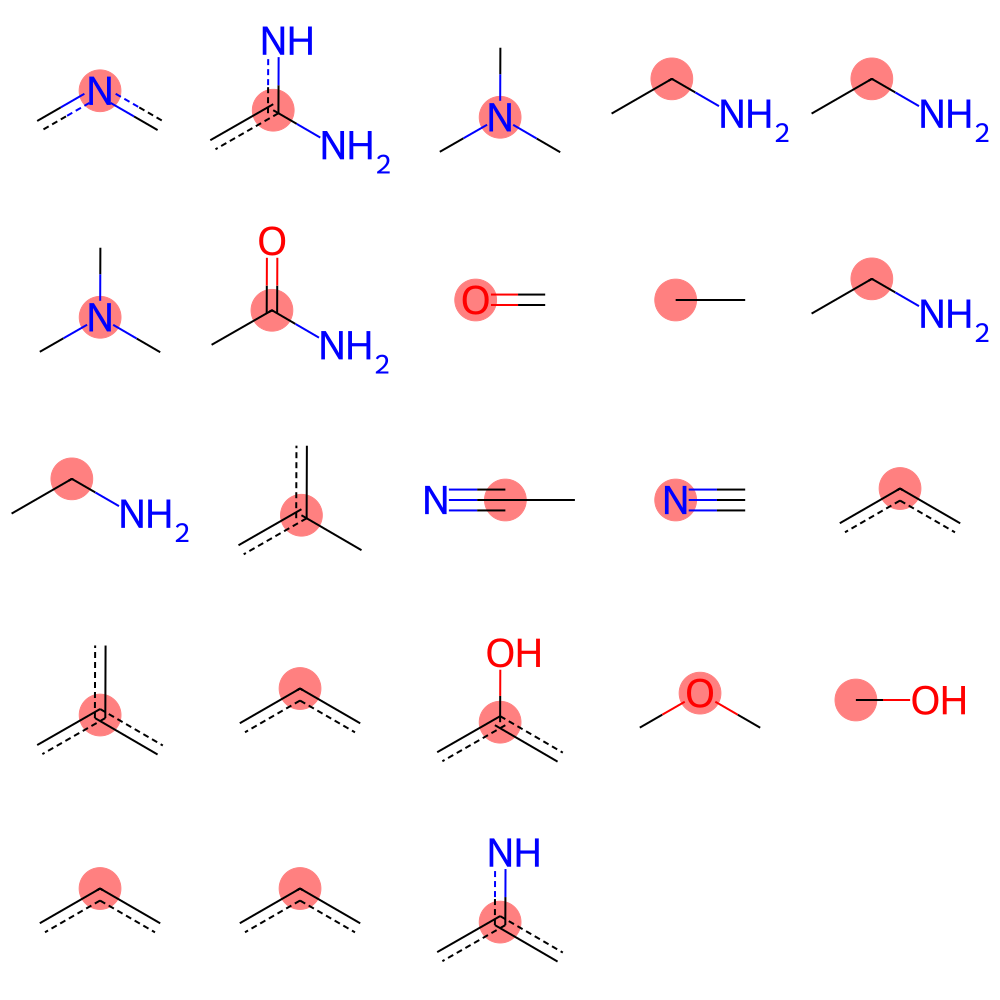

In [8]:
# draw all fragments
Draw.MolsToGridImage(list_of_fragments, highlightAtomLists=[[0] for _ in range(len(list_of_fragments))], molsPerRow=5)

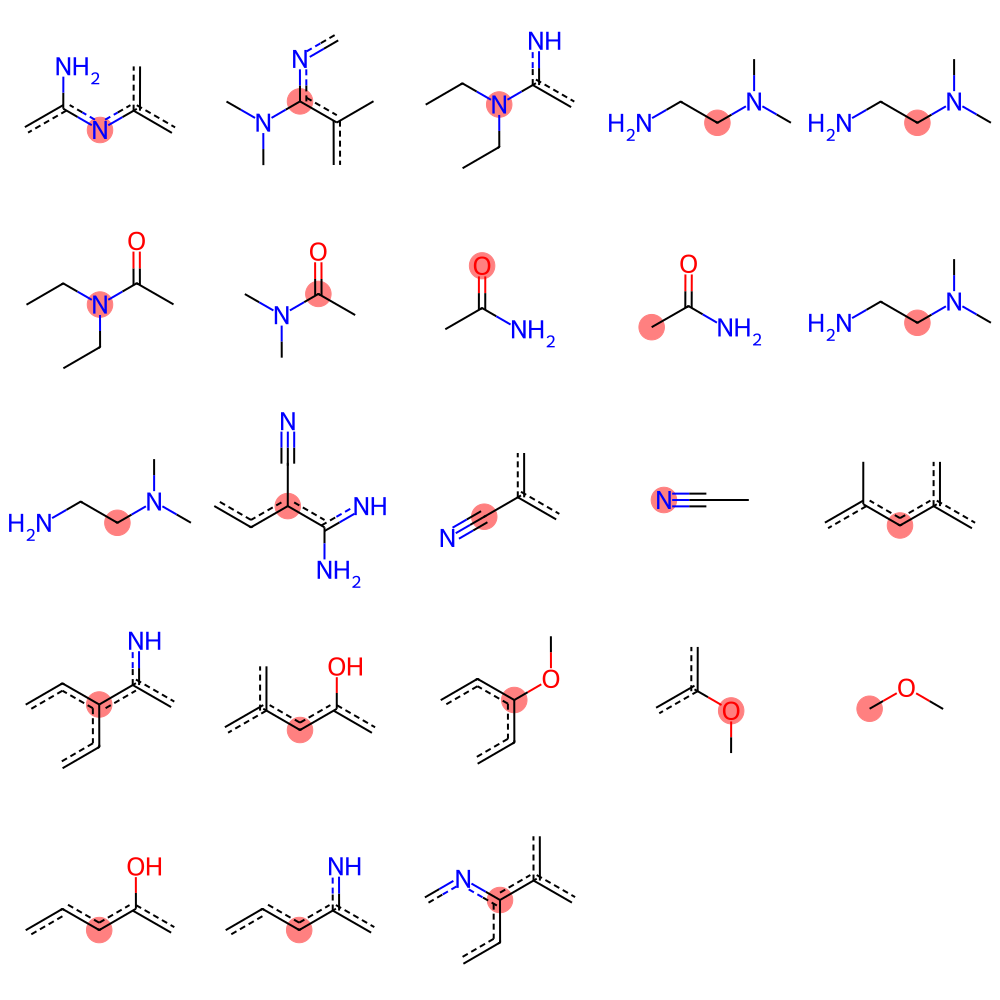

In [9]:
# fragmentstion with radious =2
list_of_fragments = getSubmolRadN(mol, 2)
Draw.MolsToGridImage(list_of_fragments, highlightAtomLists=[[0] for _ in range(len(list_of_fragments))], molsPerRow=5)

# Fragmentation on our dataset:

In [14]:
path = 'C://Users//jadh8858//Desktop//flc//All Properties with Finguprints_3.csv'
df = pd.read_csv(path)

df = df[['Smiles','Fluorescent labeling']]
df.sample(3)

,Smiles,Fluorescent labeling
5957,COc1ccc2c(=O)c3c([nH]c2c1)-c1ccccc1NC3(C)C,Yes
12511,N#CC(C#N)=Cc1ccc(-c2ccc(-c3nc4ccccc4s3)c(O)c2)o1,Yes
30958,CC(C)C1=NOC2=NC=C(C=C12)C(=O)NC1=CN(CC2=CC=CC=...,No


In [15]:
df['Fluorescent labeling'].value_counts()

Fluorescent labeling
No     16400
Yes    15903
Name: count, dtype: int64

In [16]:
def getSubmolRadN(mol, radius):
    atoms=mol.GetAtoms()
    submols=[]
    for atom in atoms:
        env=Chem.FindAtomEnvironmentOfRadiusN(mol, radius, atom.GetIdx())
        amap={}
        submol=Chem.PathToSubmol(mol, env, atomMap=amap)
        if submol and submol.GetNumAtoms() > 0:
            subsmi=Chem.MolToSmiles(submol, rootedAtAtom=amap[atom.GetIdx()], canonical=False)
            submols.append(Chem.MolFromSmiles(subsmi, sanitize=False))
    return submols

df["MOL"] = df["Smiles"].apply(Chem.MolFromSmiles)
df["FRAGMENTS"] = df["MOL"].apply(getSubmolRadN, args=(3,)) # change radious
df = df.explode("FRAGMENTS")
df = df.dropna(subset=["FRAGMENTS"])
df["FRAGMENTS"] = df["FRAGMENTS"].apply(Chem.MolToSmiles)
df = df.groupby(["Fluorescent labeling", "FRAGMENTS"]).size().reset_index(name="FREQUENCY")
df = df.sort_values(by="FREQUENCY", ascending=False)

# save fragmentation df
df.to_csv("fragmentation_without_chemistry_rules.csv")

# Analysis for Flc/Non-flc:

In [49]:
df = pd.read_csv("fragmentation_without_chemistry_rules.csv")

In [50]:
# most contributing fragments to flc
df[df["Fluorescent labeling"] =='Yes'].head(10)

,Unnamed: 0,Fluorescent labeling,FRAGMENTS,FREQUENCY
0,54605,Yes,cc1ccccc1,9698
1,44184,Yes,Cc1ccccc1,8657
2,46986,Yes,c1ccccc1,7690
4,44707,Yes,Nc1ccccc1,6370
5,42191,Yes,CCCCCCC,5759
6,46566,Yes,c-c1ccccc1,5116
7,50465,Yes,cc(c)C(C)(C)C,5004
8,50957,Yes,cc(c)N(C)C,4274
9,47765,Yes,cN(c)c1ccccc1,4143
10,59011,Yes,ccc1ccccc1c,3781


In [51]:
# most contributing fragments to Non-flc

df[df["Fluorescent labeling"] == 'No '].head(10)


,Unnamed: 0,Fluorescent labeling,FRAGMENTS,FREQUENCY
3,11404,No,Cc1ccccc1,6648
12,15674,No,c1ccccc1,3718
19,23614,No,cc(c)OC,2825
20,14117,No,Nc1ccccc1,2232
22,15095,No,c-c1ccccc1,2130
24,38235,No,nc1ccccc1,2028
31,21600,No,cc(c)C(=O)N(C)C,1796
32,28592,No,ccc(F)cc,1772
33,22191,No,cc(c)C(F)(F)F,1749
35,26801,No,cc1ccccc1,1666


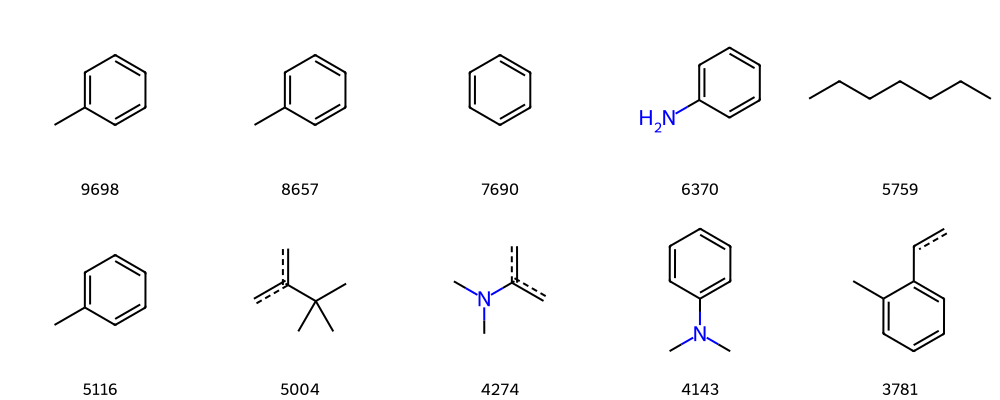

In [56]:
# flc
top_0 = [Chem.MolFromSmiles(smi,sanitize= False) for smi in df[df["Fluorescent labeling"] == 'Yes']["FRAGMENTS"].head(10)]
Draw.MolsToGridImage(top_0, molsPerRow=5, legends=[str(f) for f in df[df["Fluorescent labeling"] == 'Yes']["FREQUENCY"].head(10)])

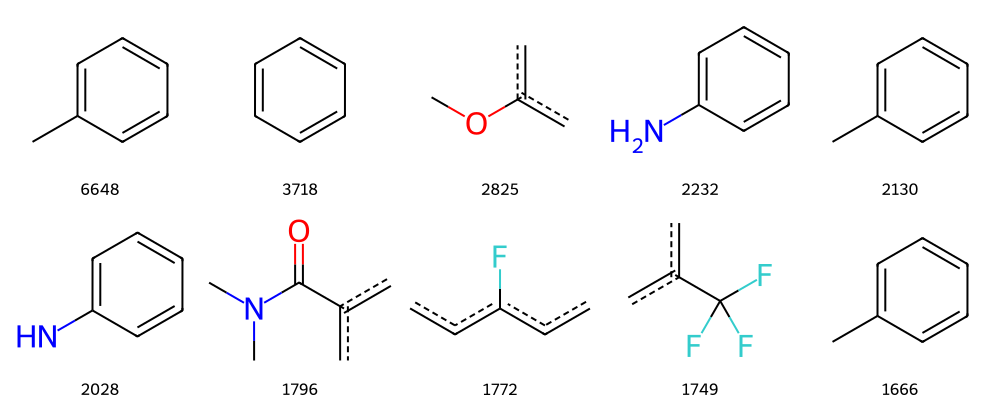

In [55]:
# non flc
top_0 = [Chem.MolFromSmiles(smi,sanitize= False) for smi in df[df["Fluorescent labeling"] == 'No ']["FRAGMENTS"].head(10)]
Draw.MolsToGridImage(top_0, molsPerRow=5, legends=[str(f) for f in df[df["Fluorescent labeling"] == 'No ']["FREQUENCY"].head(10)])